In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/Dhaka_House_rent_prediction_project/dhaka_house_rent_data.csv")
df1.head()

,id,location,beds,baths,area,rent,source
0,2062271,"Block F, Bashundhara R-A, Dhaka",3,4,"1,500 sqft",30 Thousand,https://www.bproperty.com/en/property/details-...
1,1932693,"Block J, Bashundhara R-A, Dhaka",3,2,"1,000 sqft",19.03 Thousand,https://www.bproperty.com/en/property/details-...
2,5357478,"Block I Extension, Bashundhara R-A, Dhaka",3,4,"2,420 sqft",45 Thousand,https://www.bproperty.com/en/property/details-...
3,5001340,"Block J, Bashundhara R-A, Dhaka",3,3,"2,000 sqft",26 Thousand,https://www.bproperty.com/en/property/details-...
4,3656705,"Sector 5, Uttara, Dhaka",3,3,"2,150 sqft",50 Thousand,https://www.bproperty.com/en/property/details-...


In [ ]:
df1.shape

(27774, 7)

In [ ]:
df1.columns

Index(['id', 'location', 'beds', 'baths', 'area', 'rent', 'source'], dtype='object')

In [ ]:
# df1.groupby('area_type')['area_type'].agg('count')

In [ ]:
# df1.rename(columns={'area':'total_sqft'},inplace=True)

In [ ]:
df2=df1.drop(['id','source'],axis='columns')
df2.head()

,location,beds,baths,area,rent
0,"Block F, Bashundhara R-A, Dhaka",3,4,"1,500 sqft",30 Thousand
1,"Block J, Bashundhara R-A, Dhaka",3,2,"1,000 sqft",19.03 Thousand
2,"Block I Extension, Bashundhara R-A, Dhaka",3,4,"2,420 sqft",45 Thousand
3,"Block J, Bashundhara R-A, Dhaka",3,3,"2,000 sqft",26 Thousand
4,"Sector 5, Uttara, Dhaka",3,3,"2,150 sqft",50 Thousand


In [ ]:
df2.isnull().sum()

location    0
beds        0
baths       0
area        0
rent        0
dtype: int64

In [ ]:
df3=df2.dropna()
df3.isnull().sum()

location    0
beds        0
baths       0
area        0
rent        0
dtype: int64

In [ ]:
df3['beds'].unique()

array([ 3,  2,  4,  5,  1,  6, 40, 21,  7, 24,  8, 20, 63, 10, 11, 36])

In [ ]:
# df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0]))

In [ ]:
# df3['bhk'].unique()

In [ ]:
df3[df3.beds>20]

,location,beds,baths,area,rent
408,"Block L, Bashundhara R-A, Dhaka",40,10,"25,000 sqft",4 Lakh
474,"Gulshan 1, Gulshan, Dhaka",21,10,"25,900 sqft",21 Lakh
1544,"Nikunja 2, Nikunja, Dhaka",24,10,"9,600 sqft",3 Lakh
3791,"Block A, South Banasree Project, Banasree, Dhaka",63,10,"30,898 sqft",5 Lakh
26661,"Sector 10, Uttara, Dhaka",24,10,"7,600 sqft",1.6 Lakh
26973,"Sector 10, Uttara, Dhaka",36,10,"25,000 sqft",12.5 Lakh


In [ ]:
df3['total_sqft']= df3['area'].str.replace(',', '')

In [ ]:
df3['total_sqft']=df3['total_sqft'].apply(lambda x: int(x.split(" ")[0]))

In [ ]:
df3.total_sqft.unique()

array([  1500,   1000,   2420,   2000,   2150,    900,   1800,   1250,
         1200,   3680,   1058,   1300,   1650,   2700,   2660,    800,
         1570,   2300,   2550,   1900,    950,   4137,   1524,   2400,
         1050,   1180,   1450,   2359,   3000,   1700,   1600,   2200,
         2100,   2960,    650,    850,   2800,   2021,    600,   1750,
          700,   2082,   2750,    400,   2250,   1057,    750,   2600,
         1550,   3500,    550,   1612,    450,   5500,   1890,   3600,
         1530,   2500,   2840,   1850,   1393,   1360,    500,   1372,
         1460,   7000,   1100,   3750,   3200,   1400,   1320,   6000,
         5400,   2015,   2720,   1350,   1410,   1710,   5200,   1480,
         4700,   1375,   1215,   3100,   1950,   3245,   2450,   1778,
         2075,   1776,   4000,   2050,    970,   6500,   1663,   4200,
         1580,   1943,   3300,   3800,    980,   1654,   1165,   5000,
         1875,   1075,   1830,   1735,  25000,   3346,   1970,   1124,
      

In [ ]:
df3["rent"]= df3["rent"].replace({"Thousand":"*1000", "Lakh":"*100000"}, regex=True).map(pd.eval).astype(float)


In [ ]:
df3

,location,beds,baths,area,rent,total_sqft
0,"Block F, Bashundhara R-A, Dhaka",3,4,"1,500 sqft",30000.0,1500
1,"Block J, Bashundhara R-A, Dhaka",3,2,"1,000 sqft",19030.0,1000
2,"Block I Extension, Bashundhara R-A, Dhaka",3,4,"2,420 sqft",45000.0,2420
3,"Block J, Bashundhara R-A, Dhaka",3,3,"2,000 sqft",26000.0,2000
4,"Sector 5, Uttara, Dhaka",3,3,"2,150 sqft",50000.0,2150
...,...,...,...,...,...,...
27769,"Sector 11, Uttara, Dhaka",1,1,400 sqft,12000.0,400
27770,"Block C, Section 10, Mirpur, Dhaka",2,2,650 sqft,12500.0,650
27771,"Eastern Pallabi, Pallabi, Mirpur, Dhaka",1,1,350 sqft,11000.0,350
27772,"West Shewrapara, Mirpur, Dhaka",3,3,"1,250 sqft",17000.0,1250


In [ ]:
# df3['location']= df3['location'].str.split(",").str[1]

In [ ]:
def xtlocation(x):
  tokens= x.split(",")
  if len(tokens)==2:
    return tokens[0]
  if len(tokens)==3:
    return tokens[1]
  if len(tokens)==4:
    return tokens[2]
  if len(tokens)==1:
    return tokens[0]
  

In [ ]:
df22=  df3.copy()
df22['location']= df22['location'].apply(xtlocation)

In [ ]:
df22

,location,beds,baths,area,rent,total_sqft
0,Bashundhara R-A,3,4,"1,500 sqft",30000.0,1500
1,Bashundhara R-A,3,2,"1,000 sqft",19030.0,1000
2,Bashundhara R-A,3,4,"2,420 sqft",45000.0,2420
3,Bashundhara R-A,3,3,"2,000 sqft",26000.0,2000
4,Uttara,3,3,"2,150 sqft",50000.0,2150
...,...,...,...,...,...,...
27769,Uttara,1,1,400 sqft,12000.0,400
27770,Mirpur,2,2,650 sqft,12500.0,650
27771,Mirpur,1,1,350 sqft,11000.0,350
27772,Mirpur,3,3,"1,250 sqft",17000.0,1250


In [ ]:
df4=df22.drop(["area"],axis="columns")
df4

,location,beds,baths,rent,total_sqft
0,Bashundhara R-A,3,4,30000.0,1500
1,Bashundhara R-A,3,2,19030.0,1000
2,Bashundhara R-A,3,4,45000.0,2420
3,Bashundhara R-A,3,3,26000.0,2000
4,Uttara,3,3,50000.0,2150
...,...,...,...,...,...
27769,Uttara,1,1,12000.0,400
27770,Mirpur,2,2,12500.0,650
27771,Mirpur,1,1,11000.0,350
27772,Mirpur,3,3,17000.0,1250


In [ ]:
df4.loc[180]

location       Sutrapur
beds                  3
baths                 2
rent            22000.0
total_sqft         1100
Name: 180, dtype: object

In [ ]:
df4.isnull().sum()

location      1949
beds             0
baths            0
rent             0
total_sqft       0
dtype: int64

In [ ]:
df5=df4.dropna()
df5.isnull().sum()

location      0
beds          0
baths         0
rent          0
total_sqft    0
dtype: int64

In [ ]:
df6= df5.copy()
df6['rent_per_sqft']= (df6['rent'])/df6['total_sqft']
df6.head()

,location,beds,baths,rent,total_sqft,rent_per_sqft
0,Bashundhara R-A,3,4,30000.0,1500,20.000000
1,Bashundhara R-A,3,2,19030.0,1000,19.030000
2,Bashundhara R-A,3,4,45000.0,2420,18.595041
3,Bashundhara R-A,3,3,26000.0,2000,13.000000
4,Uttara,3,3,50000.0,2150,23.255814


In [ ]:
len(df6.location.unique())

118

In [ ]:
df6.location= df6.location.apply(lambda x: x.strip())
location_stats= df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Mirpur             6850
Mohammadpur        2786
Uttara             1815
Badda              1467
Bashundhara R-A    1351
                   ... 
Sadarghat             2
Chadd Uddan           2
Banglamotors          2
Dumni                 1
Zafrabad              1
Name: location, Length: 72, dtype: int64

In [ ]:
len(location_stats[location_stats<=10])

12

In [ ]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [ ]:
df6.location=df6.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df6.location.unique())

61

In [ ]:
df6.head()

,location,beds,baths,rent,total_sqft,rent_per_sqft
0,Bashundhara R-A,3,4,30000.0,1500,20.000000
1,Bashundhara R-A,3,2,19030.0,1000,19.030000
2,Bashundhara R-A,3,4,45000.0,2420,18.595041
3,Bashundhara R-A,3,3,26000.0,2000,13.000000
4,Uttara,3,3,50000.0,2150,23.255814


In [ ]:
 len(df6[df6.total_sqft/df6.beds<300])

913

In [ ]:
df7=df6[~(df6.total_sqft/df6.beds<300)]
df7.shape

(24912, 6)

In [ ]:
df7.rent_per_sqft.describe()

count    24912.000000
mean        19.092722
std          6.838447
min          7.222222
25%         15.384615
50%         18.000000
75%         21.111111
max        228.571429
Name: rent_per_sqft, dtype: float64

In [ ]:
#removed rent per sqft outlier using mean and std
def remove_rps_outliers(df):
  df_out=pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m= np.mean(subdf.rent_per_sqft)
    st= np.std(subdf.rent_per_sqft)
    reduced_df=subdf[(subdf.rent_per_sqft>(m-st)) & (subdf.rent_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df8=remove_rps_outliers(df7)
df8.shape

(18192, 6)

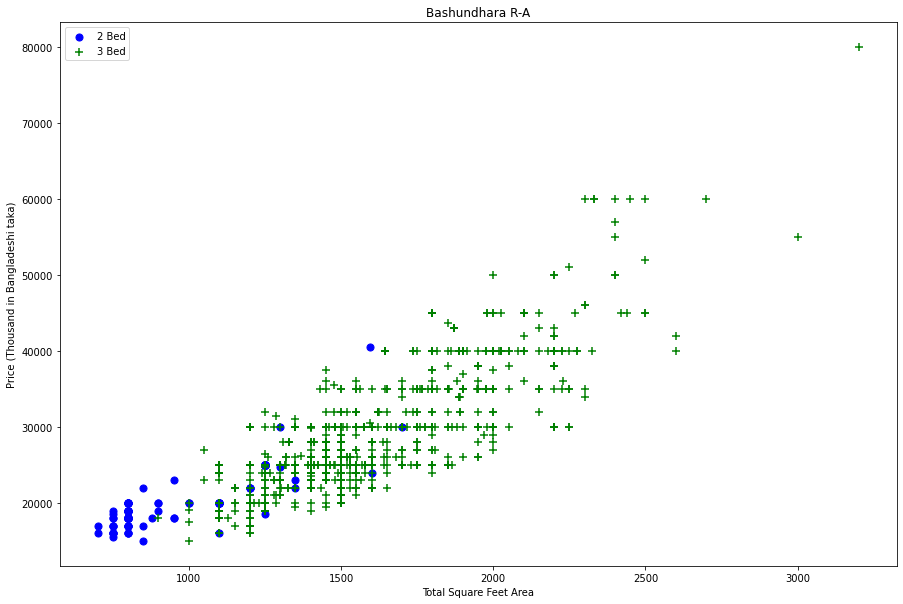

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.beds==2)]
    bhk3 = df[(df.location==location) & (df.beds==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.rent,color='blue',label='2 Bed', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.rent,marker='+', color='green',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Thousand in Bangladeshi taka)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Bashundhara R-A")


In [ ]:
#complex
def remove_bhk_outliers(df):
  exclude_indices= np.array([])
  for location, location_df in df.groupby("location"):
    bhk_stats= {}
    for bhk, bhk_df in location_df.groupby("beds"):
      bhk_stats[bhk]= {
          'mean': np.mean(bhk_df.rent_per_sqft),
          'std': np.std(bhk_df.rent_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('beds'):
      stats= bhk_stats.get(bhk-1)
      if stats and stats['count']> 5:
        exclude_indices= np.append(exclude_indices,bhk_df[bhk_df.rent_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df9= remove_bhk_outliers(df8)
df9.shape

(9112, 6)

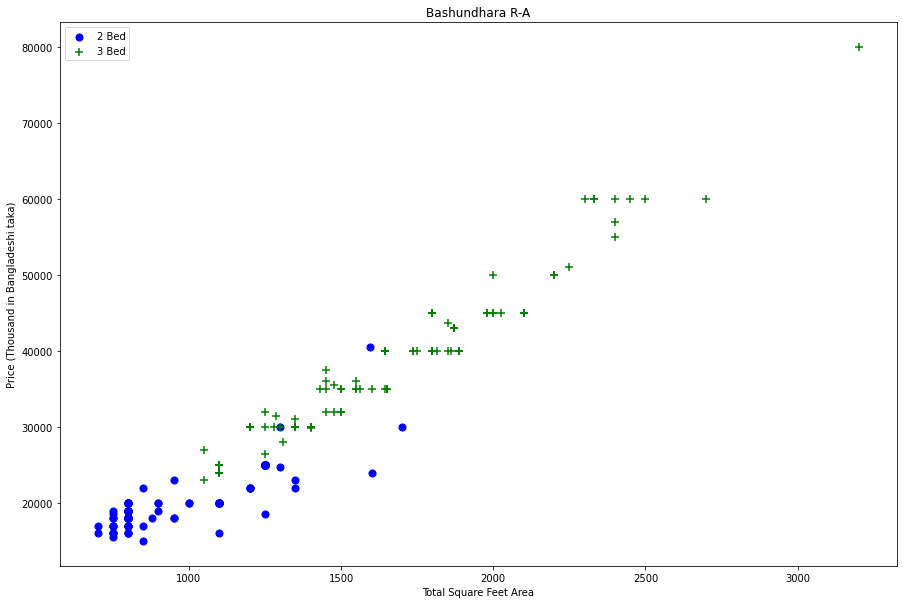

In [ ]:
plot_scatter_chart(df9,"Bashundhara R-A")

In [ ]:
plt.hist(df9.rent_per_sqft,rwidth=0.8)
plt.xlabel("Rent Per Square Feet")
plt.ylabel("Count")

NameError: ignored

In [ ]:
df9.baths.unique()

array([ 3,  2,  1,  4,  5, 10,  6,  7,  8])

In [ ]:
df9[df9.baths>10]

,location,beds,baths,rent,total_sqft,rent_per_sqft


Text(0, 0.5, 'Count')

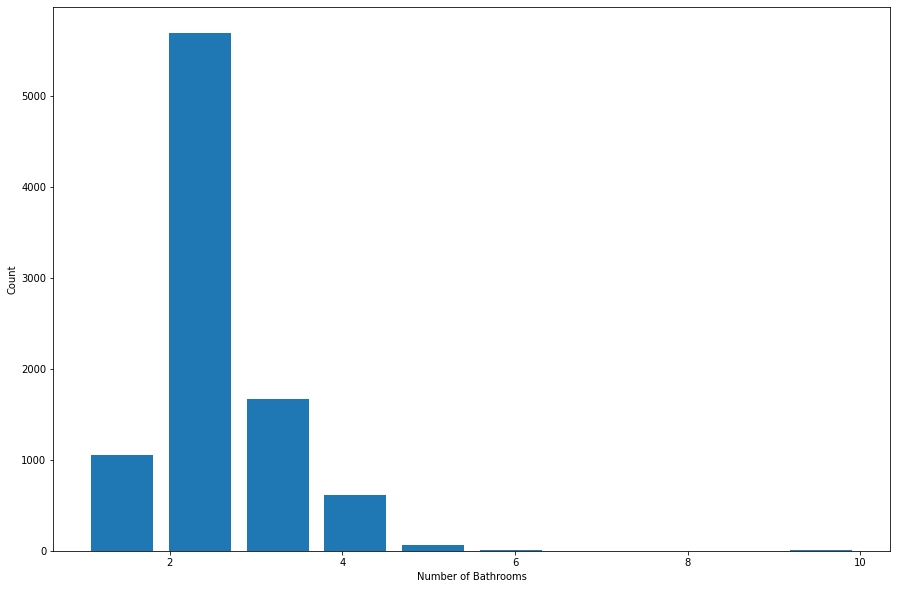

In [ ]:
plt.hist(df9.baths,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [ ]:
df9[df9.baths>df9.beds+2]

,location,beds,baths,rent,total_sqft,rent_per_sqft


In [ ]:
df10= df9[df9.baths<df9.beds+2]
df10.shape

(9099, 6)

In [ ]:
df11= df10.drop(["rent_per_sqft"],axis='columns')
df11.head(10)

,location,beds,baths,rent,total_sqft
8,Adabor,3,3,30000.0,1550
11,Adabor,2,2,16000.0,800
14,Adabor,2,2,15000.0,850
15,Adabor,3,3,30000.0,1550
16,Adabor,3,3,30000.0,1550
18,Adabor,2,2,15000.0,800
19,Adabor,2,2,15000.0,800
24,Adabor,2,3,16000.0,800
25,Adabor,2,2,15000.0,800
26,Adabor,2,2,15000.0,850


In [ ]:
dummies= pd.get_dummies(df11.location)
dummies.head(3)

,Adabor,Aftab Nagar,Agargaon,Badda,Banani,Banani DOHS,Banasree,Bangshal,Baridhara,Baridhara DOHS,...,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara,other
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12= pd.concat([df11,dummies.drop("other",axis='columns')],axis="columns")
df12.head(3)

,location,beds,baths,rent,total_sqft,Adabor,Aftab Nagar,Agargaon,Badda,Banani,...,Shahjahanpur,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara
8,Adabor,3,3,30000.0,1550,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Adabor,2,2,16000.0,800,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Adabor,2,2,15000.0,850,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df13= df12.drop("location",axis='columns')
df13.head(3)

,beds,baths,rent,total_sqft,Adabor,Aftab Nagar,Agargaon,Badda,Banani,Banani DOHS,...,Shahjahanpur,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara
8,3,3,30000.0,1550,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2,2,16000.0,800,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,2,15000.0,850,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df13.shape

(9099, 64)

In [ ]:
X= df13.drop('rent',axis='columns')
X.head()

,beds,baths,total_sqft,Adabor,Aftab Nagar,Agargaon,Badda,Banani,Banani DOHS,Banasree,...,Shahjahanpur,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara
8,3,3,1550,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2,2,800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,2,850,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,3,1550,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,3,3,1550,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df13.rent
y.head()

8     30000.0
11    16000.0
14    15000.0
15    30000.0
16    30000.0
Name: rent, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_trin,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_trin,y_train)
model.score(X_test,y_test)

0.8693739484622186

In [ ]:
#k-fold cross validataion
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.89389374, 0.91160627, 0.91271213, 0.90648691, 0.88811993])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.902564,{'normalize': True}
1,lasso,0.902542,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.933406,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
X.columns

Index(['beds', 'baths', 'total_sqft', 'Adabor', 'Aftab Nagar', 'Agargaon',
       'Badda', 'Banani', 'Banani DOHS', 'Banasree', 'Bangshal', 'Baridhara',
       'Baridhara DOHS', 'Bashabo', 'Bashundhara R-A', 'Cantonment',
       'Dakshin Khan', 'Demra', 'Dhaka', 'Dhanmondi', 'Eskaton', 'Gulshan',
       'Hatirpool', 'Hazaribag', 'Ibrahimpur', 'Jatra Bari', 'Joar Sahara',
       'Kachukhet', 'Kafrul', 'Kakrail', 'Kalabagan', 'Kalachandpur',
       'Kamrangirchar', 'Kathalbagan', 'Khilgaon', 'Khilkhet', 'Kuril',
       'Lalbagh', 'Lalmatia', 'Maghbazar', 'Malibagh', 'Maniknagar', 'Mirpur',
       'Mohakhali', 'Mohammadpur', 'Motijheel', 'Mugdapara', 'Nadda',
       'New Market', 'Niketan', 'Nikunja', 'North Shahjahanpur', 'Rampura',
       'Shahjahanpur', 'Shantinagar', 'Shegunbagicha', 'Shiddheswari',
       'Shyamoli', 'Shyampur', 'Sutrapur', 'Tejgaon', 'Turag', 'Uttara'],
      dtype='object')

In [ ]:
def predict_price(location,bed,bath,sqft):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bed
    x[1] = bath
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [ ]:
predict_price('Uttara',2,2,1000)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


24128.03385298405

In [ ]:
predict_price('Mirpur',3,3,2000)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


46018.12424194164

In [ ]:
# import pickle
# with open('Dhaka_home_rent_model.pickle','wb') as f:
#   pickle.dump(model,f)

In [ ]:
# import json
# columns ={
#     'data_columns' :[col.lower() for col in X.columns]
# }
# with open("columns.json",'w') as f:
#   f.write(json.dumps(columns))

# **End**

In [ ]:
#Note
x=np.zeros(len(X.columns))
x[0]= 12
x[0]

12.0

In [ ]:
#Note
X.columns

Index(['beds', 'baths', 'total_sqft', 'Adabor', 'Aftab Nagar', 'Agargaon',
       'Badda', 'Banani', 'Banani DOHS', 'Banasree', 'Bangshal', 'Baridhara',
       'Baridhara DOHS', 'Bashabo', 'Bashundhara R-A', 'Cantonment',
       'Dakshin Khan', 'Demra', 'Dhaka', 'Dhanmondi', 'Eskaton', 'Gulshan',
       'Hatirpool', 'Hazaribag', 'Ibrahimpur', 'Jatra Bari', 'Joar Sahara',
       'Kachukhet', 'Kafrul', 'Kakrail', 'Kalabagan', 'Kalachandpur',
       'Kamrangirchar', 'Kathalbagan', 'Khilgaon', 'Khilkhet', 'Kuril',
       'Lalbagh', 'Lalmatia', 'Maghbazar', 'Malibagh', 'Maniknagar', 'Mirpur',
       'Mohakhali', 'Mohammadpur', 'Motijheel', 'Mugdapara', 'Nadda',
       'New Market', 'Niketan', 'Nikunja', 'North Shahjahanpur', 'Rampura',
       'Shahjahanpur', 'Shantinagar', 'Shegunbagicha', 'Shiddheswari',
       'Shyamoli', 'Shyampur', 'Sutrapur', 'Tejgaon', 'Turag', 'Uttara'],
      dtype='object')

In [ ]:
#Note
np.where(X.columns=="Mirpur")[0][0]

42